<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller: Modelos de deterioro <br>
    Parte 3 (punto 5)</center></h1>

Importamos las librerias a utilizar...

In [1]:
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib.pyplot as plt # importar librería de matplotlib
import numpy as np
import math
import sympy as sym
from sympy import integrate
import scipy as sp
import scipy.stats as ss
from scipy.stats import gamma
import decimal
import seaborn as sns
decimal.getcontext().prec = 5
%matplotlib inline

<h4> 5. Considere un sistema que se va a modelar utilizando una cadena de Markov $\{X_n, n=1,2,...\}$ con $X_n$ el estado del sistema al tiempo $n$. Los estados del sistema son ${\bf S}=\{1,2,3,4,5\}$, donde $S=1$ es falla total y $S=5$ es funcionamiento óptimo. La matriz de transición está definida por: <br>
       <br>
    \begin{equation}
    {\bf P}_{ij}=\frac{0.2+(i-j)^2}{1+\sum_{k=1}^5(i-k)^2} 
    \end{equation} <br>
    
<h5>a) Escriba la matriz de transición ${\bf P}$. Explique que significan las siguientes probabilidades ${\bf P}_{24}$, ${\bf P}_{33}$ y ${\bf P}_{52}$. Qué significa $X_5=2$?

In [2]:
#Matriz de transición

matriz_transicion=pd.DataFrame(np.zeros(shape=(5,5)),index=[1,2,3,4,5],columns=[1,2,3,4,5])

for i in range(1,6):
    
    for j in range(1,6):
        
        matriz_transicion[j][i]=(0.2+(i-j)**2)/(1+sum((i-k)**2 for k in range(1,6))) #se escribe [j][i] porque los dataframe leen [columna] [fila], puede analizar las prob y ver que estan en la ubicacion correcta

matriz_transicion

,1,2,3,4,5
1,0.006452,0.038710,0.135484,0.296774,0.522581
2,0.075000,0.012500,0.075000,0.262500,0.575000
3,0.381818,0.109091,0.018182,0.109091,0.381818
4,0.575000,0.262500,0.075000,0.012500,0.075000
5,0.522581,0.296774,0.135484,0.038710,0.006452


<h5> b) Escriba la matriz de transición ${\bf P}^{(1)}$ para un sistema que solamente se deteriora (no es posible la recuperación en ningún estado). En este caso la matriz de transición se calcula como:<br>
    
<br>
\begin{equation}
{\bf P}_{ij}= \left\{\begin{matrix}
\frac{\frac{0.2+(i-j)^2}{1+\sum_{k=1}^5(i-k)^2}}{\sum_{h=1}^n\frac{0.2+(i-h)^2}{1+\sum_{k=1}^5(i-k)^2}} & \text{if } i \geq j \\ 
0 & \text{otherwise}
\end{matrix}\right.
\end{equation}


donde $n$ es el número de estados posibles en la siguiente transición. Analice la matriz y concluya.

In [3]:
#Matriz de transición
matriz_transicion_det=pd.DataFrame(np.zeros(shape=(5,5)),index=[1,2,3,4,5],columns=[1,2,3,4,5])

for i in range(1,6):
    for j in range(1,6):
        if i>=j:
            matriz_transicion_det[j][i]=((0.2+(i-j)**2)/(1+sum((1-k)**2 for k in range(1,6))))/(sum((0.2+(i-h)**2)/(1+sum((1-k)**2 for k in range(1,6))) for h in range(1,i+1))) #se escribe [j][i] porque los dataframe leen [columna] [fila], puede analizar las prob y ver que estan en la ubicacion correcta
        else:
            matriz_transicion_det[j][i]=0
matriz_transicion_det

,1,2,3,4,5
1,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.857143,0.142857,0.000000,0.000000,0.000000
3,0.750000,0.214286,0.035714,0.000000,0.000000
4,0.621622,0.283784,0.081081,0.013514,0.000000
5,0.522581,0.296774,0.135484,0.038710,0.006452


<h5> c) Escriba la matriz de transición ${\bf P}^{(2)}$ para un sistema que se deteriora y para el cuál la recuperación solo es posible cuando alcanza el estado 1 (no es posible una intervención en ningún otro estado). La recuperación implica retornar a un sistemas "good as new''. Analice la matriz y concluya.

In [4]:
matriz_transicion_rec_en_1=pd.DataFrame(sp.linalg.tril(matriz_transicion,k=0)) #diagonalización
matriz_transicion_rec_en_1.iloc[0,4]=matriz_transicion.iloc[0,4] #Cuando se está en estado 1 se puede recuperar a 5 
matriz_transicion_rec_en_1.columns=[1,2,3,4,5]
matriz_transicion_rec_en_1.index=[1,2,3,4,5]

#Redistribución de las probabilidades para que la suma de las filas sea 1 
sumas1=[matriz_transicion_rec_en_1.iloc[0,:].sum(),matriz_transicion_rec_en_1.iloc[1,:].sum(),matriz_transicion_rec_en_1.iloc[2,:].sum(),matriz_transicion_rec_en_1.iloc[3,:].sum(),matriz_transicion_rec_en_1.iloc[4,:].sum()]

for i in range(0,5):
    for j in range(0,5):
        matriz_transicion_rec_en_1.iloc[i,j]=matriz_transicion_rec_en_1.iloc[i,j]/sumas1[i]
matriz_transicion_rec_en_1

,1,2,3,4,5
1,0.012195,0.000000,0.000000,0.000000,0.987805
2,0.857143,0.142857,0.000000,0.000000,0.000000
3,0.750000,0.214286,0.035714,0.000000,0.000000
4,0.621622,0.283784,0.081081,0.013514,0.000000
5,0.522581,0.296774,0.135484,0.038710,0.006452


In [5]:
matrix = np.array(matriz_transicion_rec_en_1)
p2 = np.linalg.matrix_power(matrix, 2)
P2 = pd.DataFrame(data=p2, index=[1,2,3,4,5], columns=[1,2,3,4,5])
P2

,1,2,3,4,5
1,0.516356,0.293155,0.133832,0.038238,0.018419
2,0.132902,0.020408,0.000000,0.000000,0.846690
3,0.219606,0.038265,0.001276,0.000000,0.740854
4,0.320035,0.061750,0.003991,0.000183,0.614041
5,0.389798,0.084328,0.008851,0.000773,0.516249


<h5> d) Escriba la matriz de transición ${\bf P}^{(3)}$ para un sistema que se deteriora y para el cuál, cuando alcanza el estado 1, la recuperación implica retornar a un sistema "as good as new"; y cuando llega al estado 2, la recuperación retorna el sistema al estado 4 (no es posible una intervención en ningún otro estado). Analice la matriz y concluya.

In [6]:
matriz_transicion_rec_1_2=pd.DataFrame(sp.linalg.tril(matriz_transicion,k=0)) #diagonalización
matriz_transicion_rec_1_2.iloc[0,4]=matriz_transicion.iloc[0,4] #Cuando se está en estado 1 se puede recuperar a 5 
matriz_transicion_rec_1_2.iloc[1,3]=matriz_transicion.iloc[1,3] #Cuando se está en estado 2 se puede recuperar a 4
matriz_transicion_rec_1_2.columns=[1,2,3,4,5]
matriz_transicion_rec_1_2.index=[1,2,3,4,5]

#Redistribución de las probabilidades para que la suma de las filas sea 1 
sumas2=[matriz_transicion_rec_1_2.iloc[0,:].sum(),matriz_transicion_rec_1_2.iloc[1,:].sum(),matriz_transicion_rec_1_2.iloc[2,:].sum(),matriz_transicion_rec_1_2.iloc[3,:].sum(),matriz_transicion_rec_1_2.iloc[4,:].sum()]

for i in range(0,5):
    for j in range(0,5):
        matriz_transicion_rec_1_2.iloc[i,j]=matriz_transicion_rec_1_2.iloc[i,j]/sumas2[i]
matriz_transicion_rec_1_2

,1,2,3,4,5
1,0.012195,0.000000,0.000000,0.000000,0.987805
2,0.214286,0.035714,0.000000,0.750000,0.000000
3,0.750000,0.214286,0.035714,0.000000,0.000000
4,0.621622,0.283784,0.081081,0.013514,0.000000
5,0.522581,0.296774,0.135484,0.038710,0.006452


In [7]:
matrix = np.array(matriz_transicion_rec_1_2)
p3 = np.linalg.matrix_power(matrix, 3)
P3 = pd.DataFrame(data=p3, index=[1,2,3,4,5], columns=[1,2,3,4,5])
P3

,1,2,3,4,5
1,0.202885,0.055466,0.010376,0.221096,0.510178
2,0.230867,0.093974,0.033844,0.169278,0.472037
3,0.492294,0.266294,0.113450,0.042330,0.085632
4,0.464692,0.244658,0.100607,0.050156,0.139886
5,0.428946,0.220366,0.088369,0.062401,0.199918


<h5> e) Considere un sistema cuyo estado inicial es  óptimo. Cuál es la probabilidad de que los sistemas definidos en los puntos a) a d) se encuentren en cada estado después de 1,5,10,15,20 y 50 años?. Analice y concluya.

In [8]:
p0=[0,0,0,0,1] #Estado inicial óptimo 

# Sistema punto A (permite recuperación en y hacia todos los estados, además de deterioro) 
matriz_transicion_array=matriz_transicion.to_numpy()
P1_A=np.linalg.matrix_power(matriz_transicion_array, 1)
P5_A=np.linalg.matrix_power(matriz_transicion_array, 5)
P10_A=np.linalg.matrix_power(matriz_transicion_array, 10)
P15_A=np.linalg.matrix_power(matriz_transicion_array, 15)
P20_A=np.linalg.matrix_power(matriz_transicion_array, 20)
P50_A=np.linalg.matrix_power(matriz_transicion_array, 50)

p1_A=np.matmul(p0,P1_A)
p5_A=np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p15_A=np.matmul(p0,P15_A)
p20_A=np.matmul(p0,P20_A)
p50_A=np.matmul(p0,P50_A)

df_PuntoA = pd.DataFrame([p1_A],columns=[1,2,3,4,5])
df_PuntoA.loc[1]=p5_A
df_PuntoA.loc[2]=p10_A
df_PuntoA.loc[3]=p15_A
df_PuntoA.loc[4]=p20_A
df_PuntoA.loc[5]=p50_A

df_PuntoA.index=['1 year later','5 years later','10 years later','15 years later','20 years later','50 years later']

df_PuntoA

,1,2,3,4,5
1 year later,0.522581,0.296774,0.135484,0.038710,0.006452
5 years later,0.384114,0.196850,0.104793,0.107943,0.206300
10 years later,0.271772,0.140648,0.104762,0.164114,0.318704
15 years later,0.301432,0.155478,0.104762,0.149284,0.289044
20 years later,0.293603,0.151564,0.104762,0.153198,0.296873
50 years later,0.295238,0.152381,0.104762,0.152381,0.295239


In [9]:
# Sistema punto B (No permite recuperación)
matriz_transicion_det_array=matriz_transicion_det.to_numpy()
P1_B=np.linalg.matrix_power(matriz_transicion_det_array, 1)
P5_B=np.linalg.matrix_power(matriz_transicion_det_array, 5)
P10_B=np.linalg.matrix_power(matriz_transicion_det_array, 10)
P15_B=np.linalg.matrix_power(matriz_transicion_det_array, 15)
P20_B=np.linalg.matrix_power(matriz_transicion_det_array, 20)
P50_B=np.linalg.matrix_power(matriz_transicion_det_array, 50)

p1_B=np.matmul(p0,P1_B)
p5_B=np.matmul(p0,P5_B)
p10_B=np.matmul(p0,P10_B)
p15_B=np.matmul(p0,P15_B)
p20_B=np.matmul(p0,P20_B)
p50_B=np.matmul(p0,P50_B)


df_PuntoB = pd.DataFrame([p1_B],columns=[1,2,3,4,5])
df_PuntoB.loc[1]=p5_B
df_PuntoB.loc[2]=p10_B
df_PuntoB.loc[3]=p15_B
df_PuntoB.loc[4]=p20_B
df_PuntoB.loc[5]=p50_B

df_PuntoB.index=['1 year later','5 years later','10 years later','15 years later','20 years later','50 years later']

df_PuntoB

,1,2,3,4,5
1 year later,0.522581,2.967742e-01,1.354839e-01,3.870968e-02,6.451613e-03
5 years later,0.999695,3.047695e-04,5.408314e-07,2.408972e-09,1.117742e-11
10 years later,1.000000,1.819828e-08,3.193802e-14,1.112535e-18,1.249347e-22
15 years later,1.000000,1.082783e-12,1.855978e-21,5.016670e-28,1.396447e-33
20 years later,1.000000,6.442455e-17,1.078408e-28,2.260806e-37,1.560867e-44
50 years later,1.000000,2.858316e-42,4.149942e-72,1.893703e-93,3.043793e-110


In [10]:
# Sistema punto C (Recuperación al llegar al estado 1 - como nuevo)
matriz_transicion_rec_en_1_array=matriz_transicion_rec_en_1.to_numpy()
P1_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 1)
P5_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 5)
P10_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 10)
P15_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 15)
P20_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 20)
P50_C=np.linalg.matrix_power(matriz_transicion_rec_en_1_array, 50)

p1_C=np.matmul(p0,P1_C)
p5_C=np.matmul(p0,P5_C)
p10_C=np.matmul(p0,P10_C)
p15_C=np.matmul(p0,P15_C)
p20_C=np.matmul(p0,P20_C)
p50_C=np.matmul(p0,P50_C)

df_PuntoC = pd.DataFrame([p1_C],columns=[1,2,3,4,5])
df_PuntoC.loc[1]=p5_C
df_PuntoC.loc[2]=p10_C
df_PuntoC.loc[3]=p15_C
df_PuntoC.loc[4]=p20_C
df_PuntoC.loc[5]=p50_C

df_PuntoC.index=['1 year later','5 years later','10 years later','15 years later','20 years later','50 years later']

df_PuntoC

,1,2,3,4,5
1 year later,0.522581,0.296774,0.135484,0.038710,0.006452
5 years later,0.378231,0.143850,0.050975,0.013837,0.413106
10 years later,0.389054,0.152573,0.055432,0.015120,0.387822
15 years later,0.389244,0.152920,0.055642,0.015183,0.387010
20 years later,0.389242,0.152931,0.055650,0.015185,0.386992
50 years later,0.389242,0.152931,0.055650,0.015186,0.386992


In [11]:
# Sistema punto D (Dos tipos de recuperación)
matriz_transicion_rec_1_2_array=matriz_transicion_rec_1_2.to_numpy()
P1_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 1)
P5_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 5)
P10_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 10)
P15_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 15)
P20_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 20)
P50_D=np.linalg.matrix_power(matriz_transicion_rec_1_2_array, 50)

p1_D=np.matmul(p0,P1_D)
p5_D=np.matmul(p0,P5_D)
p10_D=np.matmul(p0,P10_D)
p15_D=np.matmul(p0,P15_D)
p20_D=np.matmul(p0,P20_D)
p50_D=np.matmul(p0,P50_D)

df_PuntoD = pd.DataFrame([p1_D],columns=[1,2,3,4,5])
df_PuntoD.loc[1]=p5_D
df_PuntoD.loc[2]=p10_D
df_PuntoD.loc[3]=p15_D
df_PuntoD.loc[4]=p20_D
df_PuntoD.loc[5]=p50_D

df_PuntoD.index=['1 year later','5 years later','10 years later','15 years later','20 years later','50 years later']

df_PuntoD

,1,2,3,4,5
1 year later,0.522581,0.296774,0.135484,0.038710,0.006452
5 years later,0.382096,0.186741,0.072938,0.096685,0.261539
10 years later,0.322604,0.145651,0.054227,0.134622,0.342897
15 years later,0.333738,0.153360,0.057744,0.127499,0.327659
20 years later,0.331653,0.151916,0.057086,0.128833,0.330513
50 years later,0.331982,0.152144,0.057189,0.128622,0.330063


<h5> f) Para el caso de la matriz ${\bf P}$, y un estado inicial de funcionamiento óptimo, dibuje la probabilidad de falla del sistema a través del tiempo. Considere que la falla ocurre si el sistema se encuentra en los estados 1 o 2. Analice y concluya.

In [12]:
prob_falla=np.zeros(50)
tiempo=0
while tiempo<50:
    prob_falla[tiempo]=np.matmul(p0,np.linalg.matrix_power(matriz_transicion_array, tiempo))[0]+np.matmul(p0,np.linalg.matrix_power(matriz_transicion_array, tiempo))[1]
    tiempo+=1
prob_falla

array([0.        , 0.81935484, 0.15378394, 0.6743414 , 0.27363481,
       0.58096421, 0.34545042, 0.525895  , 0.38764928, 0.49356368,
       0.41241952, 0.47458643, 0.42695856, 0.46344765, 0.4354923 ,
       0.4569097 , 0.44050121, 0.45307223, 0.4434412 , 0.45081982,
       0.44516685, 0.44949775, 0.44617972, 0.44872176, 0.44677423,
       0.44826629, 0.44712318, 0.44799895, 0.447328  , 0.44784203,
       0.44744821, 0.44774993, 0.44751878, 0.44769587, 0.44756019,
       0.44766414, 0.4475845 , 0.44764551, 0.44759877, 0.44763458,
       0.44760715, 0.44762817, 0.44761206, 0.4476244 , 0.44761495,
       0.44762219, 0.44761664, 0.44762089, 0.44761764, 0.44762013])

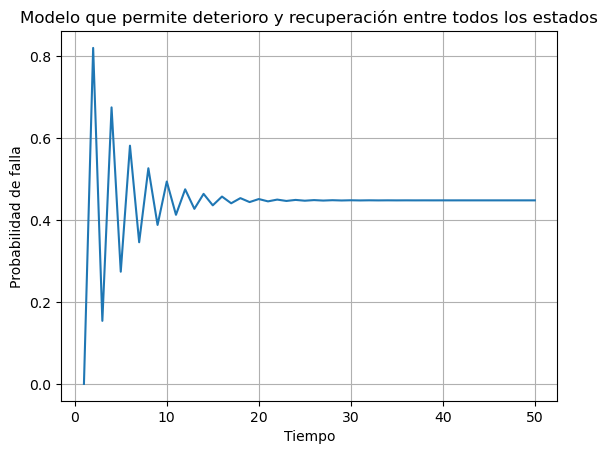

In [13]:
plt.plot(np.arange(1,51),prob_falla)
plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de falla") # Establecer el título del eje y
plt.title('Modelo que permite deterioro y recuperación entre todos los estados')
plt.grid()

<h5> g) Compare los sistemas definidos en los puntos a) a d) para los siguientes tres estados iniciales: ${\bf p}^0=\{0,0,0,0,1\}$${\bf p}^0=\{0.5,0.3,0.1,0.05,0.05\}$ y ${\bf p}^0=\{0.05,0.05,0.1,0.3,0.5\}$. En una tabla escriba las probabilidades de alcanzar cada estado después de 5, 10, 15, 20 y 50 años; además dibuje en una misma gráfica (una por sistema), la evolución de la probabilidad de cada estado a través del tiempo. Analice y concluya sobre todos los resultados generados en este ítem.

In [14]:
#Caso 1 {0,0,0,0,1} --------------------------------------------------------------------------------------------------------------------------
Caso1_A=[p5_A,p10_A,p15_A,p20_A,p50_A]
Caso1_B=[p5_B,p10_B,p15_B,p20_B,p50_B]
Caso1_C=[p5_C,p10_C,p15_C,p20_C,p50_C]
Caso1_D=[p5_D,p10_D,p15_D,p20_D,p50_D]

# PARA EL SISTEMA PUNTO A 
Caso1_A=pd.DataFrame(Caso1_A,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO B
Caso1_B=pd.DataFrame(Caso1_B,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO C 
Caso1_C=pd.DataFrame(Caso1_C,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO D 
Caso1_D=pd.DataFrame(Caso1_D,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])

In [15]:
# Caso 1 sistema A
Caso1_A

,1,2,3,4,5
5 years later,0.384114,0.196850,0.104793,0.107943,0.206300
10 years later,0.271772,0.140648,0.104762,0.164114,0.318704
15 years later,0.301432,0.155478,0.104762,0.149284,0.289044
20 years later,0.293603,0.151564,0.104762,0.153198,0.296873
50 years later,0.295238,0.152381,0.104762,0.152381,0.295239


In [16]:
# Caso 1 sistema B
Caso1_B

,1,2,3,4,5
5 years later,0.999695,3.047695e-04,5.408314e-07,2.408972e-09,1.117742e-11
10 years later,1.000000,1.819828e-08,3.193802e-14,1.112535e-18,1.249347e-22
15 years later,1.000000,1.082783e-12,1.855978e-21,5.016670e-28,1.396447e-33
20 years later,1.000000,6.442455e-17,1.078408e-28,2.260806e-37,1.560867e-44
50 years later,1.000000,2.858316e-42,4.149942e-72,1.893703e-93,3.043793e-110


In [17]:
# Caso 1 sistema C
Caso1_C

,1,2,3,4,5
5 years later,0.378231,0.143850,0.050975,0.013837,0.413106
10 years later,0.389054,0.152573,0.055432,0.015120,0.387822
15 years later,0.389244,0.152920,0.055642,0.015183,0.387010
20 years later,0.389242,0.152931,0.055650,0.015185,0.386992
50 years later,0.389242,0.152931,0.055650,0.015186,0.386992


In [18]:
# Caso 1 sistema D
Caso1_D

,1,2,3,4,5
5 years later,0.382096,0.186741,0.072938,0.096685,0.261539
10 years later,0.322604,0.145651,0.054227,0.134622,0.342897
15 years later,0.333738,0.153360,0.057744,0.127499,0.327659
20 years later,0.331653,0.151916,0.057086,0.128833,0.330513
50 years later,0.331982,0.152144,0.057189,0.128622,0.330063


In [19]:
#Caso 2 {0.5,0.3,0.1,0.05,0.05} --------------------------------------------------------------------------------------------------------------------------
p0=[0.5,0.3,0.1,0.05,0.05]

# Sistema punto A (permite recuperación en y hacia todos los estados, además de deterioro) 
p5_A=np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p15_A=np.matmul(p0,P15_A)
p20_A=np.matmul(p0,P20_A)
p50_A=np.matmul(p0,P50_A)

Caso2_A=[p5_A,p10_A,p15_A,p20_A,p50_A]

# Sistema punto B (No permite recuperación)
p5_B=np.matmul(p0,P5_B)
p10_B=np.matmul(p0,P10_B)
p15_B=np.matmul(p0,P15_B)
p20_B=np.matmul(p0,P20_B)
p50_B=np.matmul(p0,P50_B)

Caso2_B=[p5_B,p10_B,p15_B,p20_B,p50_B]

# Sistema punto C (Recuperación al llegar al estado 1 - como nuevo)
p5_C=np.matmul(p0,P5_C)
p10_C=np.matmul(p0,P10_C)
p15_C=np.matmul(p0,P15_C)
p20_C=np.matmul(p0,P20_C)
p50_C=np.matmul(p0,P50_C)

Caso2_C=[p5_C,p10_C,p15_C,p20_C,p50_C]

# Sistema punto D (Dos tipos de recuperación)
p5_D=np.matmul(p0,P5_D)
p10_D=np.matmul(p0,P10_D)
p15_D=np.matmul(p0,P15_D)
p20_D=np.matmul(p0,P20_D)
p50_D=np.matmul(p0,P50_D)

Caso2_D=[p5_D,p10_D,p15_D,p20_D,p50_D]

# PARA EL SISTEMA PUNTO A 
Caso2_A=pd.DataFrame(Caso2_A,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO B
Caso2_B=pd.DataFrame(Caso2_B,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO C 
Caso2_C=pd.DataFrame(Caso2_C,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO D 
Caso2_D=pd.DataFrame(Caso2_D,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])

In [20]:
# Caso 2 sistema A
Caso2_A

,1,2,3,4,5
5 years later,0.233700,0.121610,0.104760,0.183150,0.356781
10 years later,0.311481,0.160503,0.104762,0.144259,0.278995
15 years later,0.290951,0.150237,0.104762,0.154525,0.299525
20 years later,0.296370,0.152947,0.104762,0.151815,0.294107
50 years later,0.295238,0.152381,0.104762,0.152381,0.295238


In [21]:
# Caso 2 sistema B
Caso2_B

,1,2,3,4,5
5 years later,0.999945,5.521215e-05,4.338012e-08,1.429812e-10,5.588709e-13
10 years later,1.000000,3.290255e-09,2.550989e-15,6.578109e-20,6.246734e-24
15 years later,1.000000,1.957673e-13,1.482378e-22,2.965944e-29,6.982236e-35
20 years later,1.000000,1.164796e-17,8.613292e-30,1.336626e-38,7.804337e-46
50 years later,1.000000,5.167835e-43,3.314578e-73,1.119588e-94,1.521896e-111


In [22]:
# Caso 2 sistema C
Caso2_C

,1,2,3,4,5
5 years later,0.390098,0.157392,0.058570,0.016078,0.377862
10 years later,0.389158,0.153040,0.055736,0.015213,0.386854
15 years later,0.389236,0.152932,0.055652,0.015186,0.386995
20 years later,0.389242,0.152931,0.055650,0.015186,0.386992
50 years later,0.389242,0.152931,0.055650,0.015186,0.386992


In [23]:
# Caso 2 sistema D
Caso2_D

,1,2,3,4,5
5 years later,0.297598,0.128328,0.046315,0.150611,0.377148
10 years later,0.338423,0.156603,0.059224,0.124502,0.321248
15 years later,0.330775,0.151308,0.056808,0.129394,0.331714
20 years later,0.332208,0.152300,0.057261,0.128478,0.329753
50 years later,0.331982,0.152144,0.057189,0.128622,0.330063


In [24]:
#Caso 3 {0.05,0.05,0.1,0.3,0.5} --------------------------------------------------------------------------------------------------------------------------
p0=[0.05, 0.05, 0.1, 0.3, 0.5]

# Sistema punto A (permite recuperación en y hacia todos los estados, además de deterioro) 
p5_A=np.matmul(p0,P5_A)
p10_A=np.matmul(p0,P10_A)
p15_A=np.matmul(p0,P15_A)
p20_A=np.matmul(p0,P20_A)
p50_A=np.matmul(p0,P50_A)

Caso3_A=[p5_A,p10_A,p15_A,p20_A,p50_A]

# Sistema punto B (No permite recuperación)
p5_B=np.matmul(p0,P5_B)
p10_B=np.matmul(p0,P10_B)
p15_B=np.matmul(p0,P15_B)
p20_B=np.matmul(p0,P20_B)
p50_B=np.matmul(p0,P50_B)

Caso3_B=[p5_B,p10_B,p15_B,p20_B,p50_B]

# Sistema punto C (Recuperación al llegar al estado 1 - como nuevo)
p5_C=np.matmul(p0,P5_C)
p10_C=np.matmul(p0,P10_C)
p15_C=np.matmul(p0,P15_C)
p20_C=np.matmul(p0,P20_C)
p50_C=np.matmul(p0,P50_C)

Caso3_C=[p5_C,p10_C,p15_C,p20_C,p50_C]

# Sistema punto D (Dos tipos de recuperación)
p5_D=np.matmul(p0,P5_D)
p10_D=np.matmul(p0,P10_D)
p15_D=np.matmul(p0,P15_D)
p20_D=np.matmul(p0,P20_D)
p50_D=np.matmul(p0,P50_D)

Caso3_D=[p5_D,p10_D,p15_D,p20_D,p50_D]

# PARA EL SISTEMA PUNTO A 
Caso3_A=pd.DataFrame(Caso3_A,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO B
Caso3_B=pd.DataFrame(Caso3_B,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO C 
Caso3_C=pd.DataFrame(Caso3_C,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])
# PARA EL SISTEMA PUNTO D 
Caso3_D=pd.DataFrame(Caso3_D,index=['5 years later','10 years later','15 years later','20 years later','50 years later'],columns=[1,2,3,4,5])

In [25]:
# Caso 3 sistema A
Caso3_A

,1,2,3,4,5
5 years later,0.356781,0.183150,0.104760,0.121610,0.233700
10 years later,0.278995,0.144259,0.104762,0.160503,0.311481
15 years later,0.299525,0.154525,0.104762,0.150237,0.290951
20 years later,0.294107,0.151815,0.104762,0.152947,0.296370
50 years later,0.295238,0.152381,0.104762,0.152381,0.295238


In [26]:
# Caso 3 sistema B
Caso3_B

,1,2,3,4,5
5 years later,0.999771,2.286626e-04,3.393947e-07,1.339682e-09,5.588709e-12
10 years later,1.000000,1.364582e-08,2.000547e-14,6.171935e-19,6.246734e-23
15 years later,1.000000,8.119155e-13,1.162538e-21,2.782900e-28,6.982236e-34
20 years later,1.000000,4.830818e-17,6.754877e-29,1.254137e-37,7.804337e-45
50 years later,1.000000,2.143283e-42,2.599420e-72,1.050494e-93,1.521896e-110


In [27]:
# Caso 3 sistema C
Caso3_C

,1,2,3,4,5
5 years later,0.376415,0.147319,0.053586,0.014656,0.408024
10 years later,0.388892,0.152621,0.055487,0.015138,0.387862
15 years later,0.389236,0.152919,0.055643,0.015183,0.387019
20 years later,0.389242,0.152930,0.055650,0.015185,0.386992
50 years later,0.389242,0.152931,0.055650,0.015186,0.386992


In [28]:
# Caso 3 sistema D
Caso3_D

,1,2,3,4,5
5 years later,0.379620,0.185165,0.072247,0.097903,0.265065
10 years later,0.323050,0.145960,0.054368,0.134336,0.342286
15 years later,0.333655,0.153302,0.057718,0.127552,0.327773
20 years later,0.331668,0.151927,0.057090,0.128823,0.330492
50 years later,0.331982,0.152144,0.057189,0.128622,0.330063


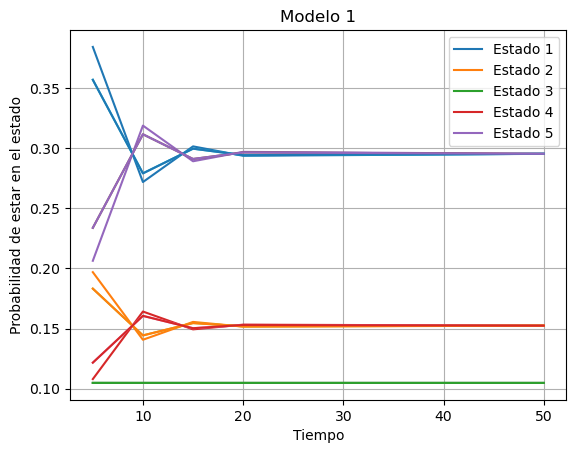

In [29]:
#GRAFICA SISTEMA PUNTO A A TRAVÉS DEL TIEMPO----------------------------------------------------------

# CASO 1 {0,0,0,0,1}
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_A.iloc[:,0]),label="Estado 1")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_A.iloc[:,1]),label="Estado 2")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_A.iloc[:,2]),label="Estado 3")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_A.iloc[:,3]),label="Estado 4")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_A.iloc[:,4]),label="Estado 5")

plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_A.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_A.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_A.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_A.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_A.iloc[:,4]))

plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_A.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_A.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_A.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_A.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_A.iloc[:,4]))

plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de estar en el estado") # Establecer el título del eje y
plt.legend(loc='upper right')
plt.title('Modelo 1')
plt.grid()

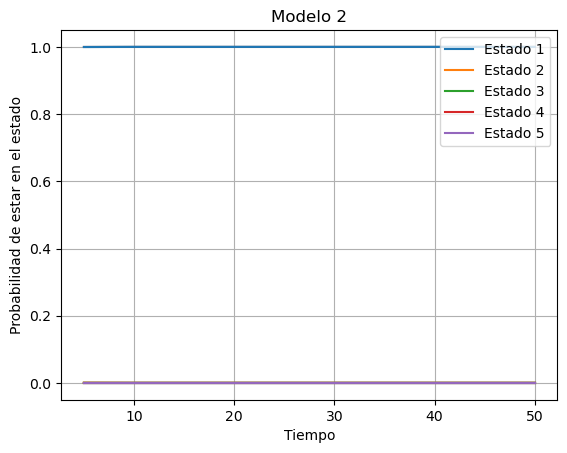

In [30]:
#GRAFICA SISTEMA PUNTO B A TRAVÉS DEL TIEMPO----------------------------------------------------------

# CASO 1 {0,0,0,0,1}
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_B.iloc[:,0]),label="Estado 1")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_B.iloc[:,1]),label="Estado 2")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_B.iloc[:,2]),label="Estado 3")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_B.iloc[:,3]),label="Estado 4")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_B.iloc[:,4]),label="Estado 5")

plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_B.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_B.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_B.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_B.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_B.iloc[:,4]))

plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_B.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_B.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_B.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_B.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_B.iloc[:,4]))

plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de estar en el estado") # Establecer el título del eje y
plt.legend(loc='upper right')
plt.title('Modelo 2')
plt.grid()

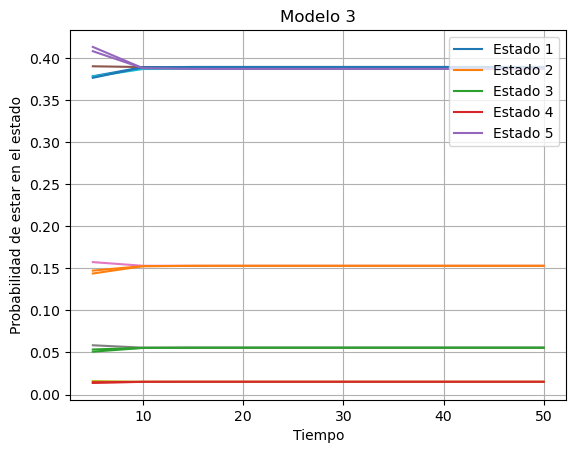

In [31]:
#GRAFICA SISTEMA PUNTO C A TRAVÉS DEL TIEMPO----------------------------------------------------------

# CASO 1 {0,0,0,0,1}
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_C.iloc[:,0]),label="Estado 1")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_C.iloc[:,1]),label="Estado 2")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_C.iloc[:,2]),label="Estado 3")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_C.iloc[:,3]),label="Estado 4")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_C.iloc[:,4]),label="Estado 5")

plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_C.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_C.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_C.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_C.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_C.iloc[:,4]))

plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_C.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_C.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_C.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_C.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_C.iloc[:,4]))

plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de estar en el estado") # Establecer el título del eje y
plt.legend(loc='upper right')
plt.title('Modelo 3')
plt.grid()

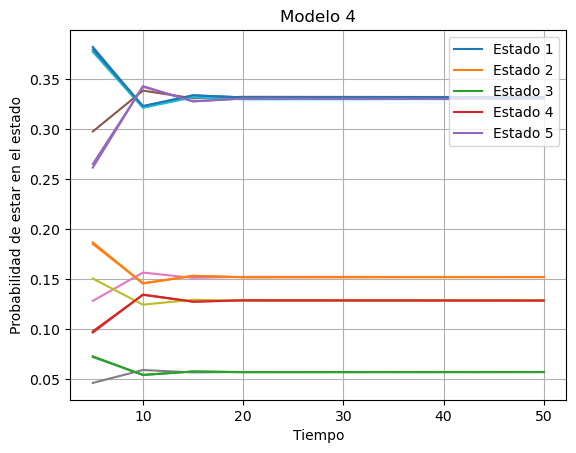

In [32]:
#GRAFICA SISTEMA PUNTO D A TRAVÉS DEL TIEMPO----------------------------------------------------------

# CASO 1 {0,0,0,0,1}
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_D.iloc[:,0]),label="Estado 1")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_D.iloc[:,1]),label="Estado 2")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_D.iloc[:,2]),label="Estado 3")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_D.iloc[:,3]),label="Estado 4")
plt.plot([5,10,15,20,50],pd.DataFrame(Caso1_D.iloc[:,4]),label="Estado 5")

plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_D.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_D.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_D.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_D.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso2_D.iloc[:,4]))

plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_D.iloc[:,0]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_D.iloc[:,1]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_D.iloc[:,2]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_D.iloc[:,3]))
plt.plot([5,10,15,20,50],pd.DataFrame(Caso3_D.iloc[:,4]))

plt.xlabel("Tiempo") # Establecer el título del eje x
plt.ylabel("Probabilidad de estar en el estado") # Establecer el título del eje y
plt.legend(loc='upper right')
plt.title('Modelo 4')
plt.grid()